### Houing Price Predicton

Goal :
The objective of this hackathon is to show case your  ML1  learning  particularly  feature engineering skills leveraging primary and secondary datasets to develop a regression model for predicting the house price in Bengaluru. This predictive model will help the  to make purchasing/renting decisions by predicting fair housing prices.

Metric to measure :
The measure of accuracy will be RMSE (root mean square error). The predicted Price for each house in the test dataset will be compared with the actual Price to calculate the RMSE value of the entire prediction. The lower the RMSE value, the better the model will be.

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
housing_data = pd.read_csv('train.csv')
housing_data.head(5)

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Data Summary

In [136]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10656 non-null  int64  
 1   area_type     10656 non-null  object 
 2   availability  10656 non-null  object 
 3   location      10655 non-null  object 
 4   size          10642 non-null  object 
 5   society       6228 non-null   object 
 6   total_sqft    10656 non-null  object 
 7   bath          10591 non-null  float64
 8   balcony       10152 non-null  float64
 9   price         10656 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 832.6+ KB


Data has 10 variables

In [137]:
housing_data.describe()

,ID,bath,balcony,price
count,10656.000000,10591.000000,10152.000000,10656.000000
mean,5327.500000,2.690586,1.581757,112.214256
std,3076.266568,1.352403,0.821357,142.231967
min,0.000000,1.000000,0.000000,8.000000
25%,2663.750000,2.000000,1.000000,50.000000
50%,5327.500000,2.000000,2.000000,72.000000
75%,7991.250000,3.000000,2.000000,120.000000
max,10655.000000,40.000000,3.000000,2700.000000


In [138]:
# 2nd table 
avg_rent = pd.read_csv('avg_rent.csv')
avg_rent.head()

,location,avg_2bhk_rent
0,Krishnarajapura,11954
1,Sarjapur,45000
2,Whitefield Hope Farm Junction,26370
3,Devanahalli,17302
4,Whitefield,14981


In [139]:
avg_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   location       157 non-null    object
 1   avg_2bhk_rent  157 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


In [140]:
avg_rent.describe()

,avg_2bhk_rent
count,157.000000
mean,21801.299363
std,62833.999789
min,1756.000000
25%,13333.000000
50%,16000.000000
75%,20250.000000
max,800000.000000


In [141]:
#3rd table 
city_dist = pd.read_csv('dist_from_city_centre.csv')
city_dist

,location,dist_from_city
0,Whitefield,17.3
1,Sarjapur Road,17.2
2,Electronic City,18.1
3,Kanakpura Road,26.5
4,Thanisandra,11.5
...,...,...
495,Kirloskar Layout,19.0
496,Sai Gardens,24.7
497,Raja Rajeshwari Nagar 5th Stage,16.4
498,4th Phase JP Nagar,10.5


In [142]:
city_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        500 non-null    object 
 1   dist_from_city  500 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [143]:
test_data=pd.read_csv('test.csv')
test_data.head(10)

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony
0,0,Super built-up Area,Ready To Move,Chamrajpet,2 BHK,NaN,650,1.0,1.0
1,1,Super built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,SrncyRe,1370,2.0,1.0
2,2,Super built-up Area,Ready To Move,Whitefield,3 BHK,AjhalNa,1725,3.0,2.0
3,3,Built-up Area,Ready To Move,Jalahalli,2 BHK,NaN,1000,2.0,0.0
4,4,Plot Area,Ready To Move,TC Palaya,1 Bedroom,NaN,1350,1.0,0.0
5,5,Plot Area,Ready To Move,7th Phase JP Nagar,4 Bedroom,NaN,3200,4.0,2.0
6,6,Super built-up Area,Ready To Move,Bellandur,3 BHK,NaN,1717,3.0,2.0
7,7,Super built-up Area,21-Dec,Kanakpura Road,2 BHK,PrarePa,700,2.0,1.0
8,8,Super built-up Area,Ready To Move,Shanthi Pura,2 BHK,ShtonDw,800,2.0,1.0
9,9,Super built-up Area,Ready To Move,Rajaji Nagar,3 BHK,PhestOn,2367,4.0,3.0


In [144]:
test_data = pd.merge(test_data, avg_rent, on='location', how='left')
test_data = pd.merge(test_data, city_dist, on='location', how='left')

In [145]:
sample_data = pd.merge(housing_data,city_dist,how='left',on='location')
sample_data

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dist_from_city
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,19.3
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,34.6
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,12.9
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,21.4
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,11.8
...,...,...,...,...,...,...,...,...,...,...,...
10651,10651,Plot Area,Ready To Move,Parappana Agrahara,1 Bedroom,NaN,1200,1.0,0.0,45.00,14.6
10652,10652,Super built-up Area,Ready To Move,Bhoganhalli,2 BHK,Srhemay,1260,2.0,1.0,69.90,15.3
10653,10653,Super built-up Area,Ready To Move,Doddanakundi Industrial Area 2,2 BHK,NaN,1092,2.0,1.0,49.00,13.4
10654,10654,Super built-up Area,Ready To Move,Kachanayakanahalli,2 BHK,ICoolon,827,2.0,0.0,34.00,NaN


In [146]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 0 to 10655
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              10656 non-null  int64  
 1   area_type       10656 non-null  object 
 2   availability    10656 non-null  object 
 3   location        10655 non-null  object 
 4   size            10642 non-null  object 
 5   society         6228 non-null   object 
 6   total_sqft      10656 non-null  object 
 7   bath            10591 non-null  float64
 8   balcony         10152 non-null  float64
 9   price           10656 non-null  float64
 10  dist_from_city  9630 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 999.0+ KB


In [147]:
sample_data.drop(columns='ID',inplace=True)

In [148]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 0 to 10655
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       10656 non-null  object 
 1   availability    10656 non-null  object 
 2   location        10655 non-null  object 
 3   size            10642 non-null  object 
 4   society         6228 non-null   object 
 5   total_sqft      10656 non-null  object 
 6   bath            10591 non-null  float64
 7   balcony         10152 non-null  float64
 8   price           10656 non-null  float64
 9   dist_from_city  9630 non-null   float64
dtypes: float64(4), object(6)
memory usage: 915.8+ KB


There are 11 variables , where 5 numierical and 6 categorical type

In [149]:
# description of the numerical data
sample_data.describe()

,bath,balcony,price,dist_from_city
count,10591.000000,10152.000000,10656.000000,9630.000000
mean,2.690586,1.581757,112.214256,15.191080
std,1.352403,0.821357,142.231967,6.242696
min,1.000000,0.000000,8.000000,1.900000
25%,2.000000,1.000000,50.000000,11.100000
50%,2.000000,2.000000,72.000000,14.400000
75%,3.000000,2.000000,120.000000,17.400000
max,40.000000,3.000000,2700.000000,47.700000


In [16]:
sample_data.describe(include=object)

,area_type,availability,location,size,society,total_sqft
count,10656,10656,10655,10642,6228,10656
unique,4,79,1197,30,2364,1923
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,7009,8468,433,4146,70,667


In [150]:
missing_values = sample_data.isnull().sum()
missing_values

area_type            0
availability         0
location             1
size                14
society           4428
total_sqft           0
bath                65
balcony            504
price                0
dist_from_city    1026
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

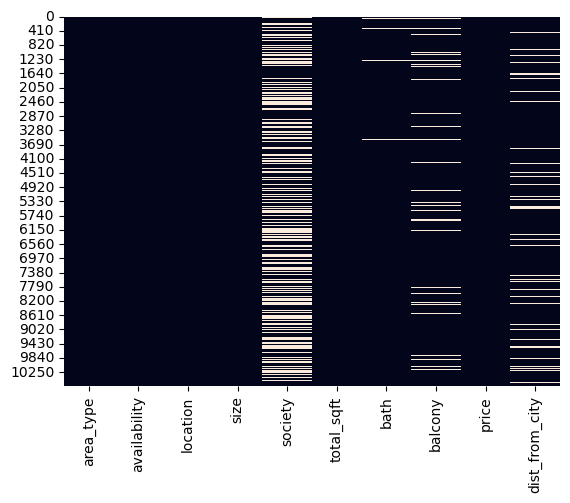

In [151]:
#plotting the missing values
sns.heatmap(sample_data.isnull(),cbar=False)
plt.show

In [152]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 0 to 10655
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       10656 non-null  object 
 1   availability    10656 non-null  object 
 2   location        10655 non-null  object 
 3   size            10642 non-null  object 
 4   society         6228 non-null   object 
 5   total_sqft      10656 non-null  object 
 6   bath            10591 non-null  float64
 7   balcony         10152 non-null  float64
 8   price           10656 non-null  float64
 9   dist_from_city  9630 non-null   float64
dtypes: float64(4), object(6)
memory usage: 915.8+ KB


In [153]:
sample_data.total_sqft.value_counts()

1200            667
1100            178
2400            163
1500            154
600             150
               ... 
1                 1
2372              1
167Sq. Meter      1
1076 - 1199       1
1426              1
Name: total_sqft, Length: 1923, dtype: int64

In [154]:
import re
def preprocess_value(value):
    # Remove non-numeric characters and convert to float
    cleaned_value = re.sub(r'[^\d.-]', '', value)
    # Handle trailing dots
    if cleaned_value.endswith('.'):
        cleaned_value = cleaned_value[:-1]  # Remove the last character (dot)
    # Handle ranges
    if '-' in cleaned_value:
        # Split the value by hyphen and take the average
        start, end = map(float, cleaned_value.split('-'))
        return (start + end) / 2
    return float(cleaned_value)

In [155]:
sample_data['total_sqft']=sample_data.total_sqft.apply(preprocess_value)

In [156]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 0 to 10655
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       10656 non-null  object 
 1   availability    10656 non-null  object 
 2   location        10655 non-null  object 
 3   size            10642 non-null  object 
 4   society         6228 non-null   object 
 5   total_sqft      10656 non-null  float64
 6   bath            10591 non-null  float64
 7   balcony         10152 non-null  float64
 8   price           10656 non-null  float64
 9   dist_from_city  9630 non-null   float64
dtypes: float64(5), object(5)
memory usage: 915.8+ KB


In [157]:
sample_data['total_sqft'].value_counts()

1200.0    667
1100.0    180
2400.0    163
1500.0    156
600.0     150
         ... 
589.0       1
1922.0      1
971.5       1
2370.0      1
1426.0      1
Name: total_sqft, Length: 1853, dtype: int64

In [158]:
sample_data.availability.value_counts()

Ready To Move    8468
18-Dec            237
18-May            233
18-Apr            204
18-Aug            162
                 ... 
16-Oct              1
15-Aug              1
17-Jan              1
16-Nov              1
20-Apr              1
Name: availability, Length: 79, dtype: int64

In [159]:
def extract_text_from_string(value):
  
    if isinstance(value, str):                              # Define regex pattern to match numeric values
        numeric_pattern = r'\d+'                           # Find all numeric values in the text
        numeric_values = re.findall(numeric_pattern, value) # Convert the numeric values to integers and return as a list
        numeric_value = ''.join(numeric_values)
        return int(numeric_value)
    else:
        return 0
    

In [160]:
sample_data['size'] = sample_data['size'].apply(extract_text_from_string)

In [161]:
sample_data['size'].value_counts().sort_index()

0       14
1      536
2     4427
3     3871
4     1137
5      282
6      175
7       77
8       68
9       48
10      10
11       4
12       1
13       1
14       1
16       1
19       1
27       1
43       1
Name: size, dtype: int64

In [162]:
sample_data.availability.value_counts

<bound method IndexOpsMixin.value_counts of 0               19-Dec
1        Ready To Move
2        Ready To Move
3        Ready To Move
4        Ready To Move
             ...      
10651    Ready To Move
10652    Ready To Move
10653    Ready To Move
10654    Ready To Move
10655    Ready To Move
Name: availability, Length: 10656, dtype: object>

In [163]:
def extract_month_string(value):
    if value == 'Ready To Move' or value == 'Immediate Possession':
        return 'Ready To Move'
    else:
        parts = value.split('-')
        try:
            return parts[1]
        except Exception as e:
            print(parts)

In [164]:
sample_data.availability = sample_data.availability.apply(extract_month_string)

In [165]:
sample_data.availability.head()

0              Dec
1    Ready To Move
2    Ready To Move
3    Ready To Move
4    Ready To Move
Name: availability, dtype: object

In [166]:
sample_data.availability.isnull().sum()

0

### Handling Missing Values

In [167]:
total_missing = sample_data.isnull().sum().sort_values(ascending=False)
percent = ((sample_data.isnull().sum()/sample_data.shape[0])*100)
percent = percent.sort_values(ascending=False)
data_missing = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
data_missing['Type'] = sample_data[data_missing.index].dtypes
data_missing

,Total,Percent,Type
society,4428,41.554054,object
dist_from_city,1026,9.628378,float64
balcony,504,4.729730,float64
bath,65,0.609985,float64
location,1,0.009384,object
area_type,0,0.000000,object
availability,0,0.000000,object
size,0,0.000000,int64
total_sqft,0,0.000000,float64
price,0,0.000000,float64


In [168]:
sample_data.shape

(10656, 10)

In [169]:
sample_data_drop = sample_data.dropna()
sample_data_drop.shape

(5698, 10)

Here 3932 rows of data is lost , hence we need to handle the values columnwise

### The variable -Balcony

In [170]:
sample_data.balcony.value_counts()

2.0    4069
1.0    3894
3.0    1342
0.0     847
Name: balcony, dtype: int64

In [171]:
sample_data.balcony.isna().sum()

504

In [172]:
def replace_balcony_values(value):
    if pd.isnull(value):
        return  0
    else:
        return value


In [173]:
sample_data.balcony = sample_data.balcony.apply(replace_balcony_values)

In [174]:
sample_data.balcony.isnull().sum()

0

In [175]:
sample_data.balcony.value_counts()

2.0    4069
1.0    3894
0.0    1351
3.0    1342
Name: balcony, dtype: int64

### The variable -Bath

In [176]:
sample_data.bath.value_counts().sort_index(ascending=True)

1.0      639
2.0     5530
3.0     2608
4.0      991
5.0      411
6.0      216
7.0       86
8.0       48
9.0       35
10.0      11
11.0       2
12.0       7
13.0       1
14.0       1
15.0       1
16.0       2
27.0       1
40.0       1
Name: bath, dtype: int64

In [177]:
sample_data.bath.isnull().sum()

65

In [178]:
def replace_bath_values(value):
    if pd.isnull(value):
        return  0
    else:
        return value


In [179]:
sample_data.bath = sample_data.bath.apply(replace_bath_values)

In [180]:
sample_data.bath.isnull().sum()

0

In [181]:
sample_data.bath.value_counts().sort_index(ascending=True)

0.0       65
1.0      639
2.0     5530
3.0     2608
4.0      991
5.0      411
6.0      216
7.0       86
8.0       48
9.0       35
10.0      11
11.0       2
12.0       7
13.0       1
14.0       1
15.0       1
16.0       2
27.0       1
40.0       1
Name: bath, dtype: int64

### The variable -Society

In [182]:
sample_data.society.value_counts()

GrrvaGr    70
PrarePa    58
Prtates    52
Sryalan    45
GMown E    45
           ..
FlsicFl     1
JRichee     1
Keersto     1
AHavenc     1
Srhemay     1
Name: society, Length: 2364, dtype: int64

In [183]:
sample_data.society.isnull().sum()

4428

In [184]:
def replace_society_values(value):
    if pd.isnull(value):
        return "Other"
    else:
        return value

In [185]:
sample_data.society = sample_data.society.apply(replace_society_values)

In [186]:
sample_data.society.isnull().sum()

0

In [187]:
sample_data.isnull().sum()

area_type            0
availability         0
location             1
size                 0
society              0
total_sqft           0
bath                 0
balcony              0
price                0
dist_from_city    1026
dtype: int64

In [188]:
avg_rent = pd.read_csv('avg_rent.csv')
avg_rent

,location,avg_2bhk_rent
0,Krishnarajapura,11954
1,Sarjapur,45000
2,Whitefield Hope Farm Junction,26370
3,Devanahalli,17302
4,Whitefield,14981
...,...,...
152,Bagaluru,8500
153,seegehalli,12000
154,Rayasandra,11000
155,JP Nagar Phase 6,21500


In [189]:
sample_merge = pd.merge(sample_data, avg_rent, on='location', how='left')
sample_merge

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dist_from_city,avg_2bhk_rent
0,Super built-up Area,Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07,19.3,11500.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00,34.6,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3,Other,1440.0,2.0,3.0,62.00,12.9,19750.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00,21.4,NaN
4,Super built-up Area,Ready To Move,Kothanur,2,Other,1200.0,2.0,1.0,51.00,11.8,16375.0
...,...,...,...,...,...,...,...,...,...,...,...
10651,Plot Area,Ready To Move,Parappana Agrahara,1,Other,1200.0,1.0,0.0,45.00,14.6,NaN
10652,Super built-up Area,Ready To Move,Bhoganhalli,2,Srhemay,1260.0,2.0,1.0,69.90,15.3,NaN
10653,Super built-up Area,Ready To Move,Doddanakundi Industrial Area 2,2,Other,1092.0,2.0,1.0,49.00,13.4,NaN
10654,Super built-up Area,Ready To Move,Kachanayakanahalli,2,ICoolon,827.0,2.0,0.0,34.00,NaN,NaN


In [190]:
sample_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 0 to 10655
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       10656 non-null  object 
 1   availability    10656 non-null  object 
 2   location        10655 non-null  object 
 3   size            10656 non-null  int64  
 4   society         10656 non-null  object 
 5   total_sqft      10656 non-null  float64
 6   bath            10656 non-null  float64
 7   balcony         10656 non-null  float64
 8   price           10656 non-null  float64
 9   dist_from_city  9630 non-null   float64
 10  avg_2bhk_rent   3665 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 999.0+ KB


In [191]:
sample_merge.isnull().sum()

area_type            0
availability         0
location             1
size                 0
society              0
total_sqft           0
bath                 0
balcony              0
price                0
dist_from_city    1026
avg_2bhk_rent     6991
dtype: int64

#### The variable Location

In [192]:
sample_merge.location.describe()

count          10655
unique          1197
top       Whitefield
freq             433
Name: location, dtype: object

In [193]:
sample_merge.location.replace(np.NaN , "Whitefield" , inplace=True)

In [194]:
sample_merge.location.isnull().sum()

0

In [195]:
sample_merge.isnull().sum().sort_index(ascending=False)

total_sqft           0
society              0
size                 0
price                0
location             0
dist_from_city    1026
bath                 0
balcony              0
avg_2bhk_rent     6991
availability         0
area_type            0
dtype: int64

### The Variable dist_from_city

In [196]:
sample_merge.dist_from_city.isnull().sum()

1026

In [197]:
sample_merge.dist_from_city.describe()

count    9630.000000
mean       15.191080
std         6.242696
min         1.900000
25%        11.100000
50%        14.400000
75%        17.400000
max        47.700000
Name: dist_from_city, dtype: float64

In [198]:
sample_merge.dist_from_city.skew()

1.4910097862407874

In [199]:
mean_dist = sample_merge.dist_from_city.mean()

In [200]:
sample_merge.dist_from_city.replace(np.NaN,mean_dist,inplace=True)

In [201]:
sample_merge.dist_from_city.isnull().sum()

0

In [202]:
sample_merge.isnull().sum().sort_index(ascending=False)

total_sqft           0
society              0
size                 0
price                0
location             0
dist_from_city       0
bath                 0
balcony              0
avg_2bhk_rent     6991
availability         0
area_type            0
dtype: int64

### The Variable avg_2bhk_rent

In [203]:
sample_merge.avg_2bhk_rent.isnull().sum()

6991

In [204]:
sample_merge.avg_2bhk_rent.describe()

count      3665.000000
mean      15363.440109
std       14472.805948
min        1756.000000
25%       11714.000000
50%       14981.000000
75%       17340.000000
max      800000.000000
Name: avg_2bhk_rent, dtype: float64

In [205]:
sample_merge.avg_2bhk_rent.skew()

43.653873134515614

In [206]:
mean_2bhk_rent = sample_merge.avg_2bhk_rent.mean()

In [207]:
sample_merge.avg_2bhk_rent.replace(np.NAN,mean_2bhk_rent,inplace=True)

In [208]:
sample_merge.avg_2bhk_rent.isnull().sum()

0

In [209]:
sample_merge.isnull().sum().sort_index(ascending=False)

total_sqft        0
society           0
size              0
price             0
location          0
dist_from_city    0
bath              0
balcony           0
avg_2bhk_rent     0
availability      0
area_type         0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

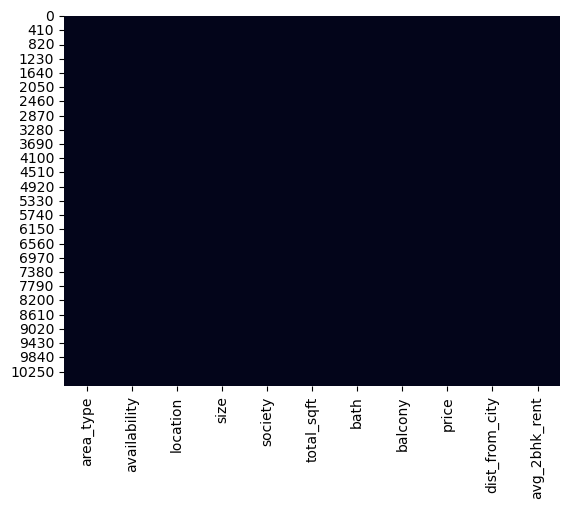

In [210]:
sns.heatmap(sample_merge.isnull(),cbar=False)
plt.show

In [211]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Handling Non-Numeric data

In [212]:
sample_merge.describe(include='object')

,area_type,availability,location,society
count,10656,10656,10656,10656
unique,4,13,1197,2365
top,Super built-up Area,Ready To Move,Whitefield,Other
freq,7009,8482,434,4428


In [213]:
cat_columns=['area_type','availability','location','society']

In [214]:
cat_data = sample_merge[cat_columns]

In [215]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [216]:
encoded_data = pd.DataFrame(encoder.fit_transform(cat_data))

C:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [217]:
encoded_columns = encoder.categories_
encoded_columns = [f"{cat_feature}_{category}" for cat_feature, categories in zip(cat_columns, encoded_columns) for category in categories]

In [218]:
# Replace column names with the encoded feature names
encoded_data.columns = encoded_columns

In [219]:
# Drop original categorical features from the dataset
sample_merge.drop(columns=cat_columns, inplace=True)

In [220]:
# Concatenate the original dataset with the encoded categorical features
data_encoded = pd.concat([sample_merge, encoded_data], axis=1)

In [221]:
data_encoded.head()

,size,total_sqft,bath,balcony,price,dist_from_city,avg_2bhk_rent,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,...,society_WishiVa,society_WoarkEm,society_Xeitaa,society_YCnce R,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1odsne,society_i1rtsCo
0,2,1056.0,2.0,1.0,39.07,19.3,11500.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,2600.0,5.0,3.0,120.00,34.6,15363.440109,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1440.0,2.0,3.0,62.00,12.9,19750.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1521.0,3.0,1.0,95.00,21.4,15363.440109,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1200.0,2.0,1.0,51.00,11.8,16375.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
data_encoded.describe()

,size,total_sqft,bath,balcony,price,dist_from_city,avg_2bhk_rent,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,...,society_WishiVa,society_WoarkEm,society_Xeitaa,society_YCnce R,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1odsne,society_i1rtsCo
count,10656.00000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,...,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000
mean,2.79786,1556.040879,2.674174,1.506944,112.214256,15.191080,15363.440109,0.180837,0.006475,0.154936,...,0.000094,0.000094,0.000094,0.000188,0.000094,0.000094,0.000188,0.000282,0.000094,0.000282
std,1.31449,1274.324444,1.364452,0.869175,142.231967,5.934526,8486.991057,0.384901,0.080212,0.361861,...,0.009687,0.009687,0.009687,0.013699,0.009687,0.009687,0.013699,0.016777,0.009687,0.016777
min,0.00000,1.000000,0.000000,0.000000,8.000000,1.900000,1756.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,1100.000000,2.000000,1.000000,50.000000,11.500000,15363.440109,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.00000,1272.000000,2.000000,2.000000,72.000000,15.100000,15363.440109,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.00000,1678.000000,3.000000,2.000000,120.000000,17.300000,15363.440109,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,43.00000,52272.000000,40.000000,3.000000,2700.000000,47.700000,800000.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [235]:
print(data_encoded.head())

   size  total_sqft  bath  balcony   price  dist_from_city  avg_2bhk_rent  \
0     2      1056.0   2.0      1.0   39.07            19.3   11500.000000   
1     4      2600.0   5.0      3.0  120.00            34.6   15363.440109   
2     3      1440.0   2.0      3.0   62.00            12.9   19750.000000   
3     3      1521.0   3.0      1.0   95.00            21.4   15363.440109   
4     2      1200.0   2.0      1.0   51.00            11.8   16375.000000   

   area_type_Built-up  Area  area_type_Carpet  Area  area_type_Plot  Area  \
0                       0.0                     0.0                   0.0   
1                       0.0                     0.0                   1.0   
2                       1.0                     0.0                   0.0   
3                       0.0                     0.0                   0.0   
4                       0.0                     0.0                   0.0   

   ...  society_WishiVa  society_WoarkEm  society_Xeitaa   society_YCnce R

In [223]:
data_encoded.price.skew()

6.751465018413554

C:\Users\Apoorva H J\AppData\Local\Temp\ipykernel_27456\2353411553.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_merge.price)


<Axes: xlabel='price', ylabel='Density'>

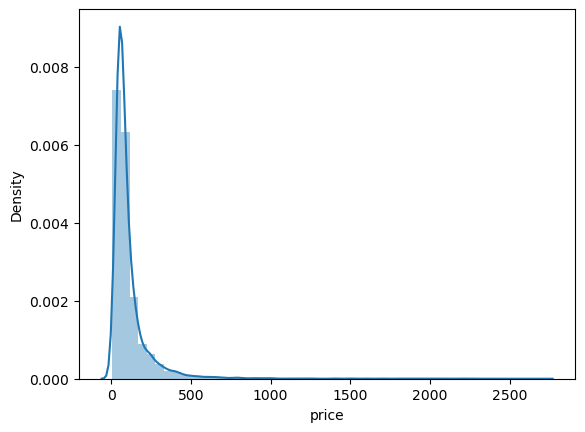

In [224]:
sns.distplot(sample_merge.price)

### Handling Numerical feature

In [225]:
data_encoded.describe(include=np.number)

,size,total_sqft,bath,balcony,price,dist_from_city,avg_2bhk_rent,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,...,society_WishiVa,society_WoarkEm,society_Xeitaa,society_YCnce R,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1odsne,society_i1rtsCo
count,10656.00000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,...,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000
mean,2.79786,1556.040879,2.674174,1.506944,112.214256,15.191080,15363.440109,0.180837,0.006475,0.154936,...,0.000094,0.000094,0.000094,0.000188,0.000094,0.000094,0.000188,0.000282,0.000094,0.000282
std,1.31449,1274.324444,1.364452,0.869175,142.231967,5.934526,8486.991057,0.384901,0.080212,0.361861,...,0.009687,0.009687,0.009687,0.013699,0.009687,0.009687,0.013699,0.016777,0.009687,0.016777
min,0.00000,1.000000,0.000000,0.000000,8.000000,1.900000,1756.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,1100.000000,2.000000,1.000000,50.000000,11.500000,15363.440109,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.00000,1272.000000,2.000000,2.000000,72.000000,15.100000,15363.440109,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.00000,1678.000000,3.000000,2.000000,120.000000,17.300000,15363.440109,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,43.00000,52272.000000,40.000000,3.000000,2700.000000,47.700000,800000.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [226]:
df_num = data_encoded.select_dtypes(include = np.number)
df_num

,size,total_sqft,bath,balcony,price,dist_from_city,avg_2bhk_rent,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,...,society_WishiVa,society_WoarkEm,society_Xeitaa,society_YCnce R,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1odsne,society_i1rtsCo
0,2,1056.0,2.0,1.0,39.07,19.30000,11500.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,2600.0,5.0,3.0,120.00,34.60000,15363.440109,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1440.0,2.0,3.0,62.00,12.90000,19750.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1521.0,3.0,1.0,95.00,21.40000,15363.440109,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1200.0,2.0,1.0,51.00,11.80000,16375.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,1,1200.0,1.0,0.0,45.00,14.60000,15363.440109,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10652,2,1260.0,2.0,1.0,69.90,15.30000,15363.440109,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10653,2,1092.0,2.0,1.0,49.00,13.40000,15363.440109,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10654,2,827.0,2.0,0.0,34.00,15.19108,15363.440109,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


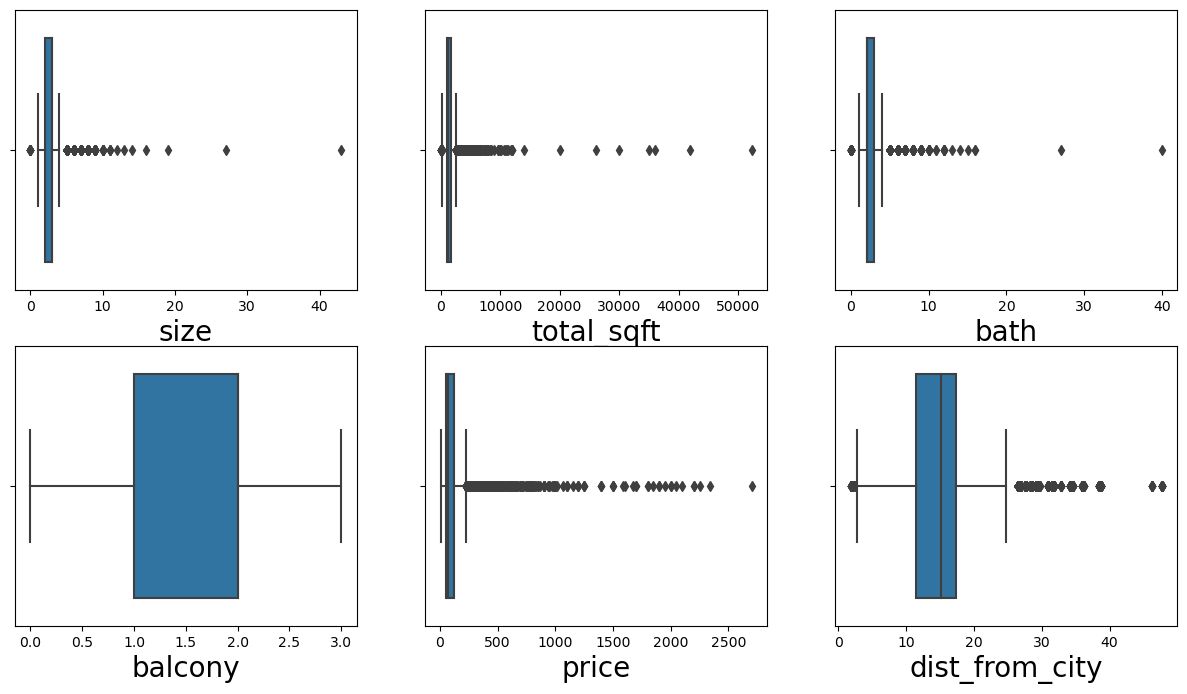

In [227]:
fig , ax = plt.subplots(2,3,figsize=(15,8))
for variable , subplot in zip(df_num.columns,ax.flatten()):
    z=sns.boxplot(x=df_num[variable],orient='h',whis=1.5,ax=subplot)
    z.set_xlabel(variable,fontsize=20)

In [237]:
#defing outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outliers_removed = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_outliers_removed
df = remove_outliers(data_encoded, 'price')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9625 entries, 0 to 10655
Columns: 3586 entries, size to society_i1rtsCo
dtypes: float64(3585), int64(1)
memory usage: 263.4 MB


In [240]:
# Convert the 'total_sqft' column to numeric, handling ranges by taking their average
def convert_sqft_to_num(sqft):
    try:
        return float(sqft)
    except:
        tokens = sqft.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        else:
            return None

# Apply the function to the 'total_sqft' column
data_encoded['total_sqft'] = data_encoded['total_sqft'].apply(convert_sqft_to_num)
test_data['total_sqft'] = test_data['total_sqft'].apply(convert_sqft_to_num)

# Drop rows where 'total_sqft' could not be converted
data_encoded = data_encoded.dropna(subset=['total_sqft'])
test_data = data_encoded.dropna(subset=['total_sqft'])

# Make sure there are no remaining non-numeric values in the 'total_sqft' column
data_encoded = data_encoded[data_encoded['total_sqft'].apply(lambda x: isinstance(x, (int, float)))]
test_data = data_encoded[test_data['total_sqft'].apply(lambda x: isinstance(x, (int, float)))]

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target variable
features = ["total_sqft", "bath", "balcony", "avg_2bhk_rent", "dist_from_city"]
X = data_encoded[features]
y = data_encoded["price"]

# Split the data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
val_predictions = model.predict(X_val)

# Evaluate the model using RMSE
val_rmse = mean_squared_error(y_val, val_predictions, squared=False)
print("Validation RMSE:", val_rmse)

df = pd.DataFrame({'price': y_test})

# Add a new column 'ID' with values ranging from 0 to the length of the array minus 1
df['ID'] = range(len(y_test))
df = df[['ID', 'price']]
# Export the DataFrame to a CSV file
df.to_csv('price_predictions.csv', index=False)


Validation RMSE: 81.98211272502259
